In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

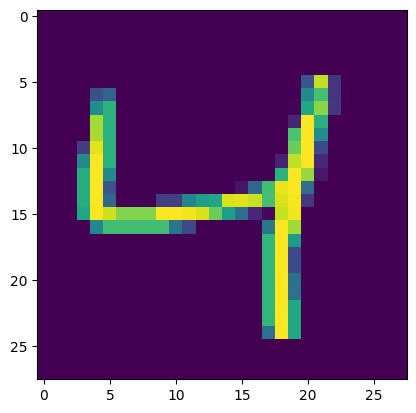

In [11]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])

the array values of train and test should be betweent 0 to 1 because whenever we train the neural network the similar the values will be , the weight will come early and the convergence will be correct. To correct this we will divide the train test from 255

why from 255 ?

because Pixel values in images typically range from 0 to 255

In [15]:
x_train = x_train/255
x_test = x_test/255

In [16]:
x_train[0]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000

In [17]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [31]:
histor = model.fit(x_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1346 - accuracy: 0.9613 - val_loss: 0.1493 - val_accuracy: 0.9582
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1313 - accuracy: 0.9626 - val_loss: 0.1477 - val_accuracy: 0.9581
Epoch 3/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1283 - accuracy: 0.9631 - val_loss: 0.1462 - val_accuracy: 0.9586
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1250 - accuracy: 0.9642 - val_loss: 0.1425 - val_accuracy: 0.9591
Epoch 5/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1219 - accuracy: 0.9648 - val_loss: 0.1392 - val_accuracy: 0.9592
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1192 - accuracy: 0.9659 - val_loss: 0.1368 - val_accuracy: 0.9614
Epoch 7/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1164 - accuracy: 0.9670 - val_loss: 0.1382 - val_accuracy

In [32]:
y_prob = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [33]:
y_pred = y_prob.argmax(axis=1)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9699

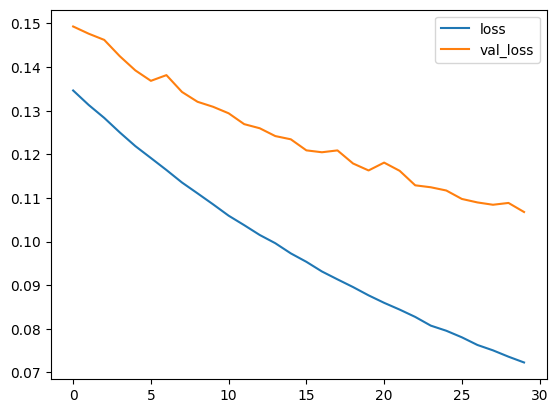

Text(0, 0.5, 'loss')

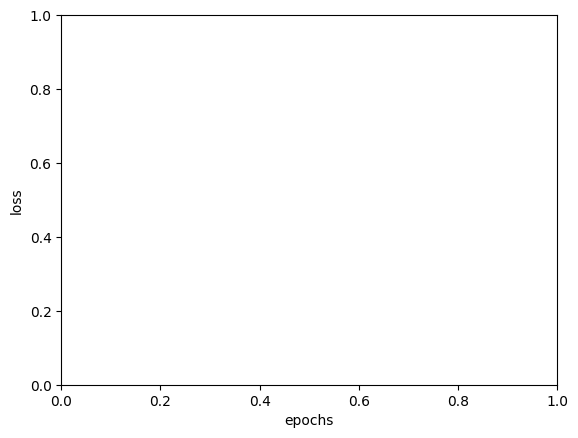

In [39]:
plt.plot(histor.history['loss'],label='loss')
plt.plot(histor.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
plt.xlabel('epochs')
plt.ylabel('loss')

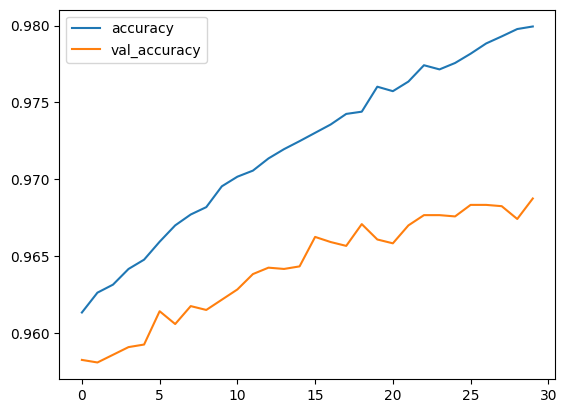

Text(0, 0.5, 'accuracy')

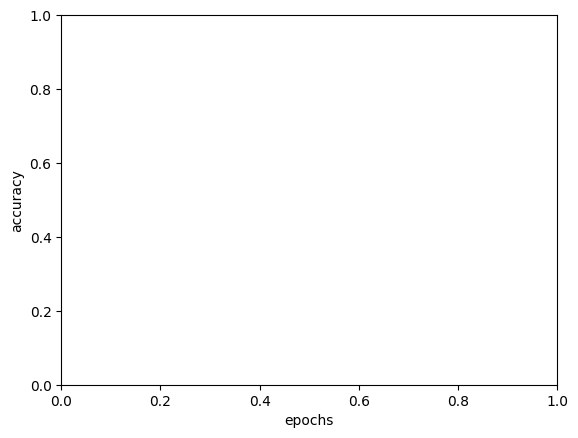

In [38]:
plt.plot(histor.history['accuracy'],label='accuracy')
plt.plot(histor.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.show()
plt.xlabel('epochs')
plt.ylabel('accuracy')